In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("C://Users//admin//Desktop//CLUSTERING//ExcelR//crime_data.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
scaler = MinMaxScaler()

#scaler.fit(df[['City']])
#df['City'] = scaler.transform(df[['City']])

scaler.fit(df[['Murder']])
df['Murder'] = scaler.transform(df[['Murder']])

scaler.fit(df[['Assault']])
df['Assault)'] = scaler.transform(df[['Assault']])

scaler.fit(df[['UrbanPop']])
df['UrbanPop'] = scaler.transform(df[['UrbanPop']])

scaler.fit(df[['Rape']])
df['Rape'] = scaler.transform(df[['Rape']])


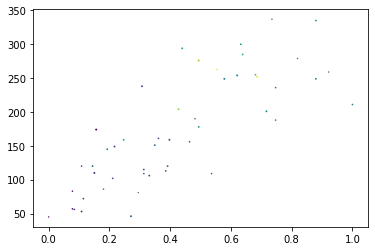

In [10]:
plt.scatter(df.Murder,df.Assault,df.UrbanPop,df.Rape)

In [11]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Murder','Assault','UrbanPop','Rape']])
    sse.append(km.inertia_)

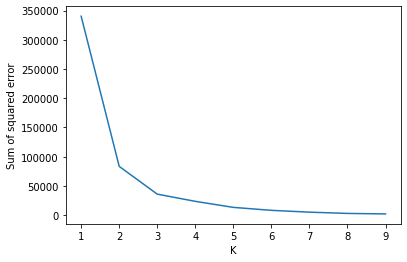

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Murder','Assault','UrbanPop','Rape']])
y_predicted

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [16]:
df['cluster']=y_predicted
df.head()

,City,Murder,Assault,UrbanPop,Rape,Assault),cluster
0,Alabama,0.746988,236,0.440678,0.359173,0.654110,1
1,Alaska,0.554217,263,0.271186,0.961240,0.746575,1
2,Arizona,0.439759,294,0.813559,0.612403,0.852740,1
3,Arkansas,0.481928,190,0.305085,0.315245,0.496575,2
4,California,0.493976,276,1.000000,0.860465,0.791096,1


In [17]:
km.cluster_centers_


array([[2.09036145e-01, 8.75500000e+01, 4.70338983e-01, 1.83204134e-01],
       [6.63403614e-01, 2.72562500e+02, 6.15466102e-01, 5.44573643e-01],
       [4.46643718e-01, 1.73285714e+02, 6.54963680e-01, 4.01624216e-01]])

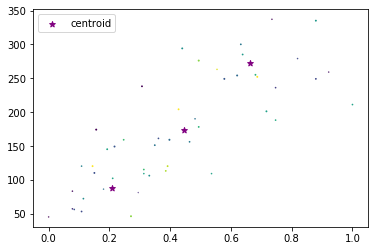

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Murder,df1.Assault,df1.UrbanPop,df1.Rape)
plt.scatter(df2.Murder,df2.Assault,df2.UrbanPop,df2.Rape)
plt.scatter(df3.Murder,df3.Assault,df3.UrbanPop,df3.Rape)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()